
# [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShubhamVashisth7/COMP-551-A1/blob/main/assignment1_group-20.ipynb) <br><br> **<font color='black'>Assignment-1-Group-20**
Members: Shubham Vashisth, Mohaddeseh Yaghoubpour, Emile Riberdy</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
SEED=42
np.random.seed(SEED)

### <font color='red'><b>Task 1: Acquire, preprocess, and analyze the data</b>

#### <b>1.1 Acquiring Data</b>
- [National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset](https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset)
- [Breast Cancer Wisconsin (Original)](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

In [2]:
# Acquiring NHANES 

nhanes = fetch_ucirepo(id=887)
nhanes_df = pd.concat([nhanes.data.features, nhanes.data.targets], axis=1)
print(f'Datapoints: {len(nhanes.data.features)}, Features: {len(nhanes.data.features.columns)}')
nhanes_df.head(5)

Datapoints: 2278, Features: 7


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [3]:
# Acquiring Breast Cancer

bcancer = fetch_ucirepo(id=15)
bcancer_df = pd.concat([bcancer.data.features, bcancer.data.targets], axis=1)
print(f'Datapoints: {len(bcancer.data.features)}, Features: {len(bcancer.data.features.columns)}')
bcancer_df.head(5)

Datapoints: 699, Features: 9


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


#### <b>1.2 Data Analysis (Data visualization and statistics)</b>

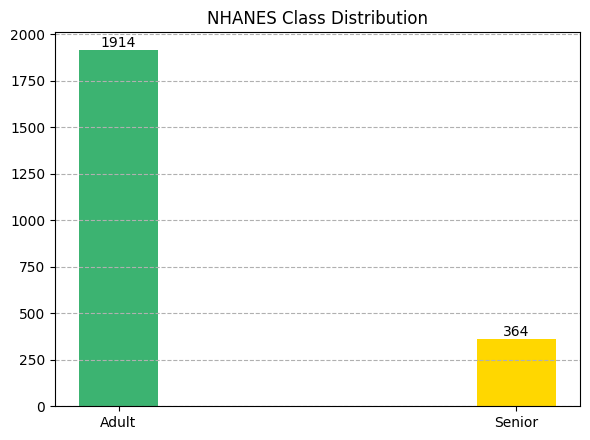

In [4]:
# Analysing NHANES

plt.figure(figsize=(6, 4.5))
plt.bar(nhanes_df['age_group'].value_counts().index, nhanes_df['age_group'].value_counts().values, width=0.2, color=['mediumseagreen', 'gold'])
for i, count in enumerate(nhanes_df['age_group'].value_counts().values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.title('NHANES Class Distribution')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

NHANES Pairplot



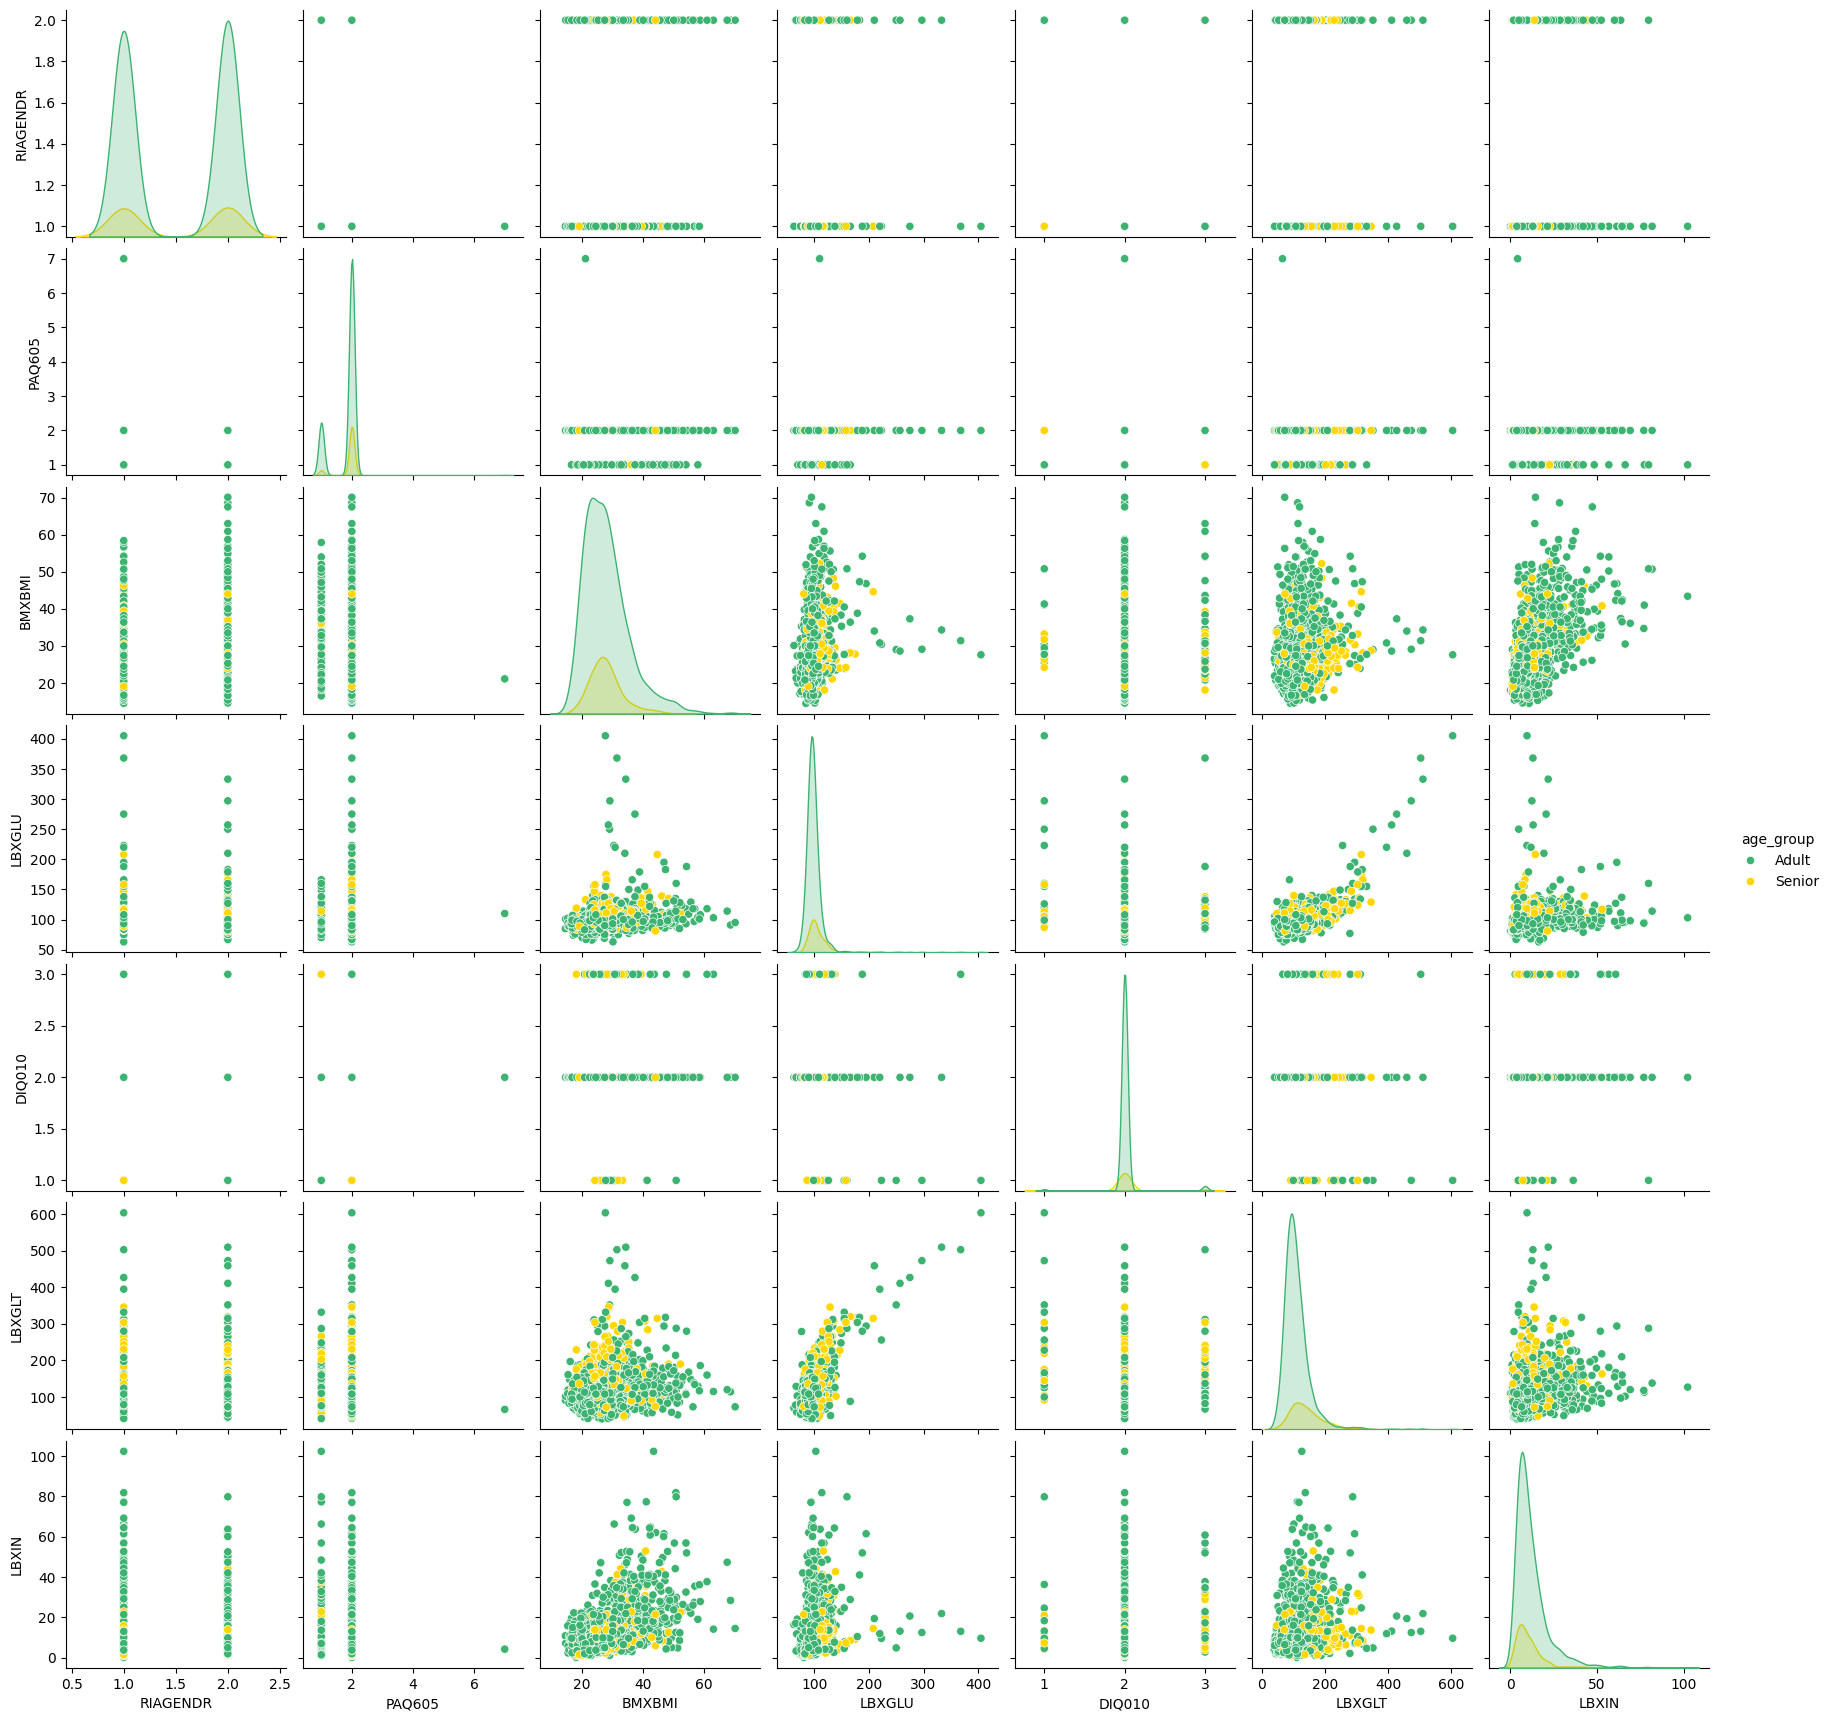

In [5]:
import seaborn

seaborn.pairplot(nhanes_df, hue ='age_group', palette=['mediumseagreen', 'gold'])
print('NHANES Pairplot\n')
plt.show()

In [6]:
nhanes_df.groupby(nhanes_df['age_group']).describe() # statistics such as mean for each feature for the positive and negative class

RIAGENDR                                               PAQ605  \
             count      mean       std  min  25%  50%  75%  max   count   
age_group                                                                 
Adult       1914.0  1.512017  0.499986  1.0  1.0  2.0  2.0  2.0  1914.0   
Senior       364.0  1.508242  0.500620  1.0  1.0  2.0  2.0  2.0   364.0   

                     ...  LBXGLT          LBXIN                              \
               mean  ...     75%    max   count       mean        std   min   
age_group            ...                                                      
Adult      1.806165  ...  124.00  604.0  1914.0  12.106661  10.060040  0.14   
Senior     1.909341  ...  166.25  346.0   364.0  10.405247   7.530538  1.02   

                                           
              25%    50%      75%     max  
age_group                                  
Adult      5.9825  9.200  14.7900  102.29  
Senior     5.2475  8.465  13.2125   52.89  

[2 rows x 56 columns]

In [7]:
def mean_sqrd_diff(group): # squared difference of the group means
  mean = group.mean()
  return ((group - mean) ** 2).mean()

nhanes_df.groupby(nhanes_df['age_group']).apply(mean_sqrd_diff)

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
age_group,,,,,,,
Adult,0.249856,0.171937,56.619428,333.097394,0.027492,1975.095000,101.151521
Senior,0.249932,0.082440,30.985965,223.385823,0.070674,2650.044318,56.553202


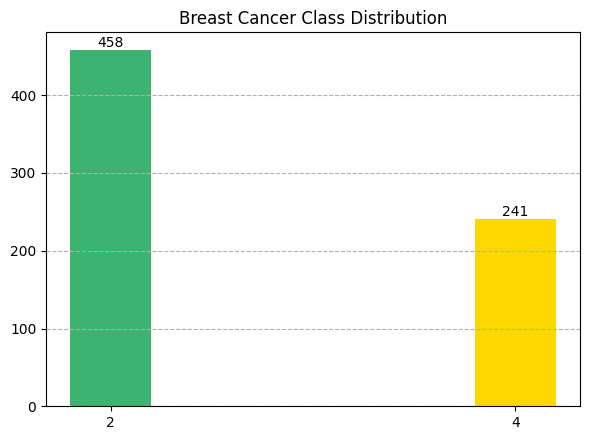

In [8]:
# Analysing Breast Cancer

plt.figure(figsize=(6, 4.5))
bars = plt.bar(bcancer_df['Class'].value_counts().index, bcancer_df['Class'].value_counts().values, width=0.4, color=['mediumseagreen', 'gold'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xticks([2, 4])
plt.title('Breast Cancer Class Distribution')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

Breast Cancer Pairplot



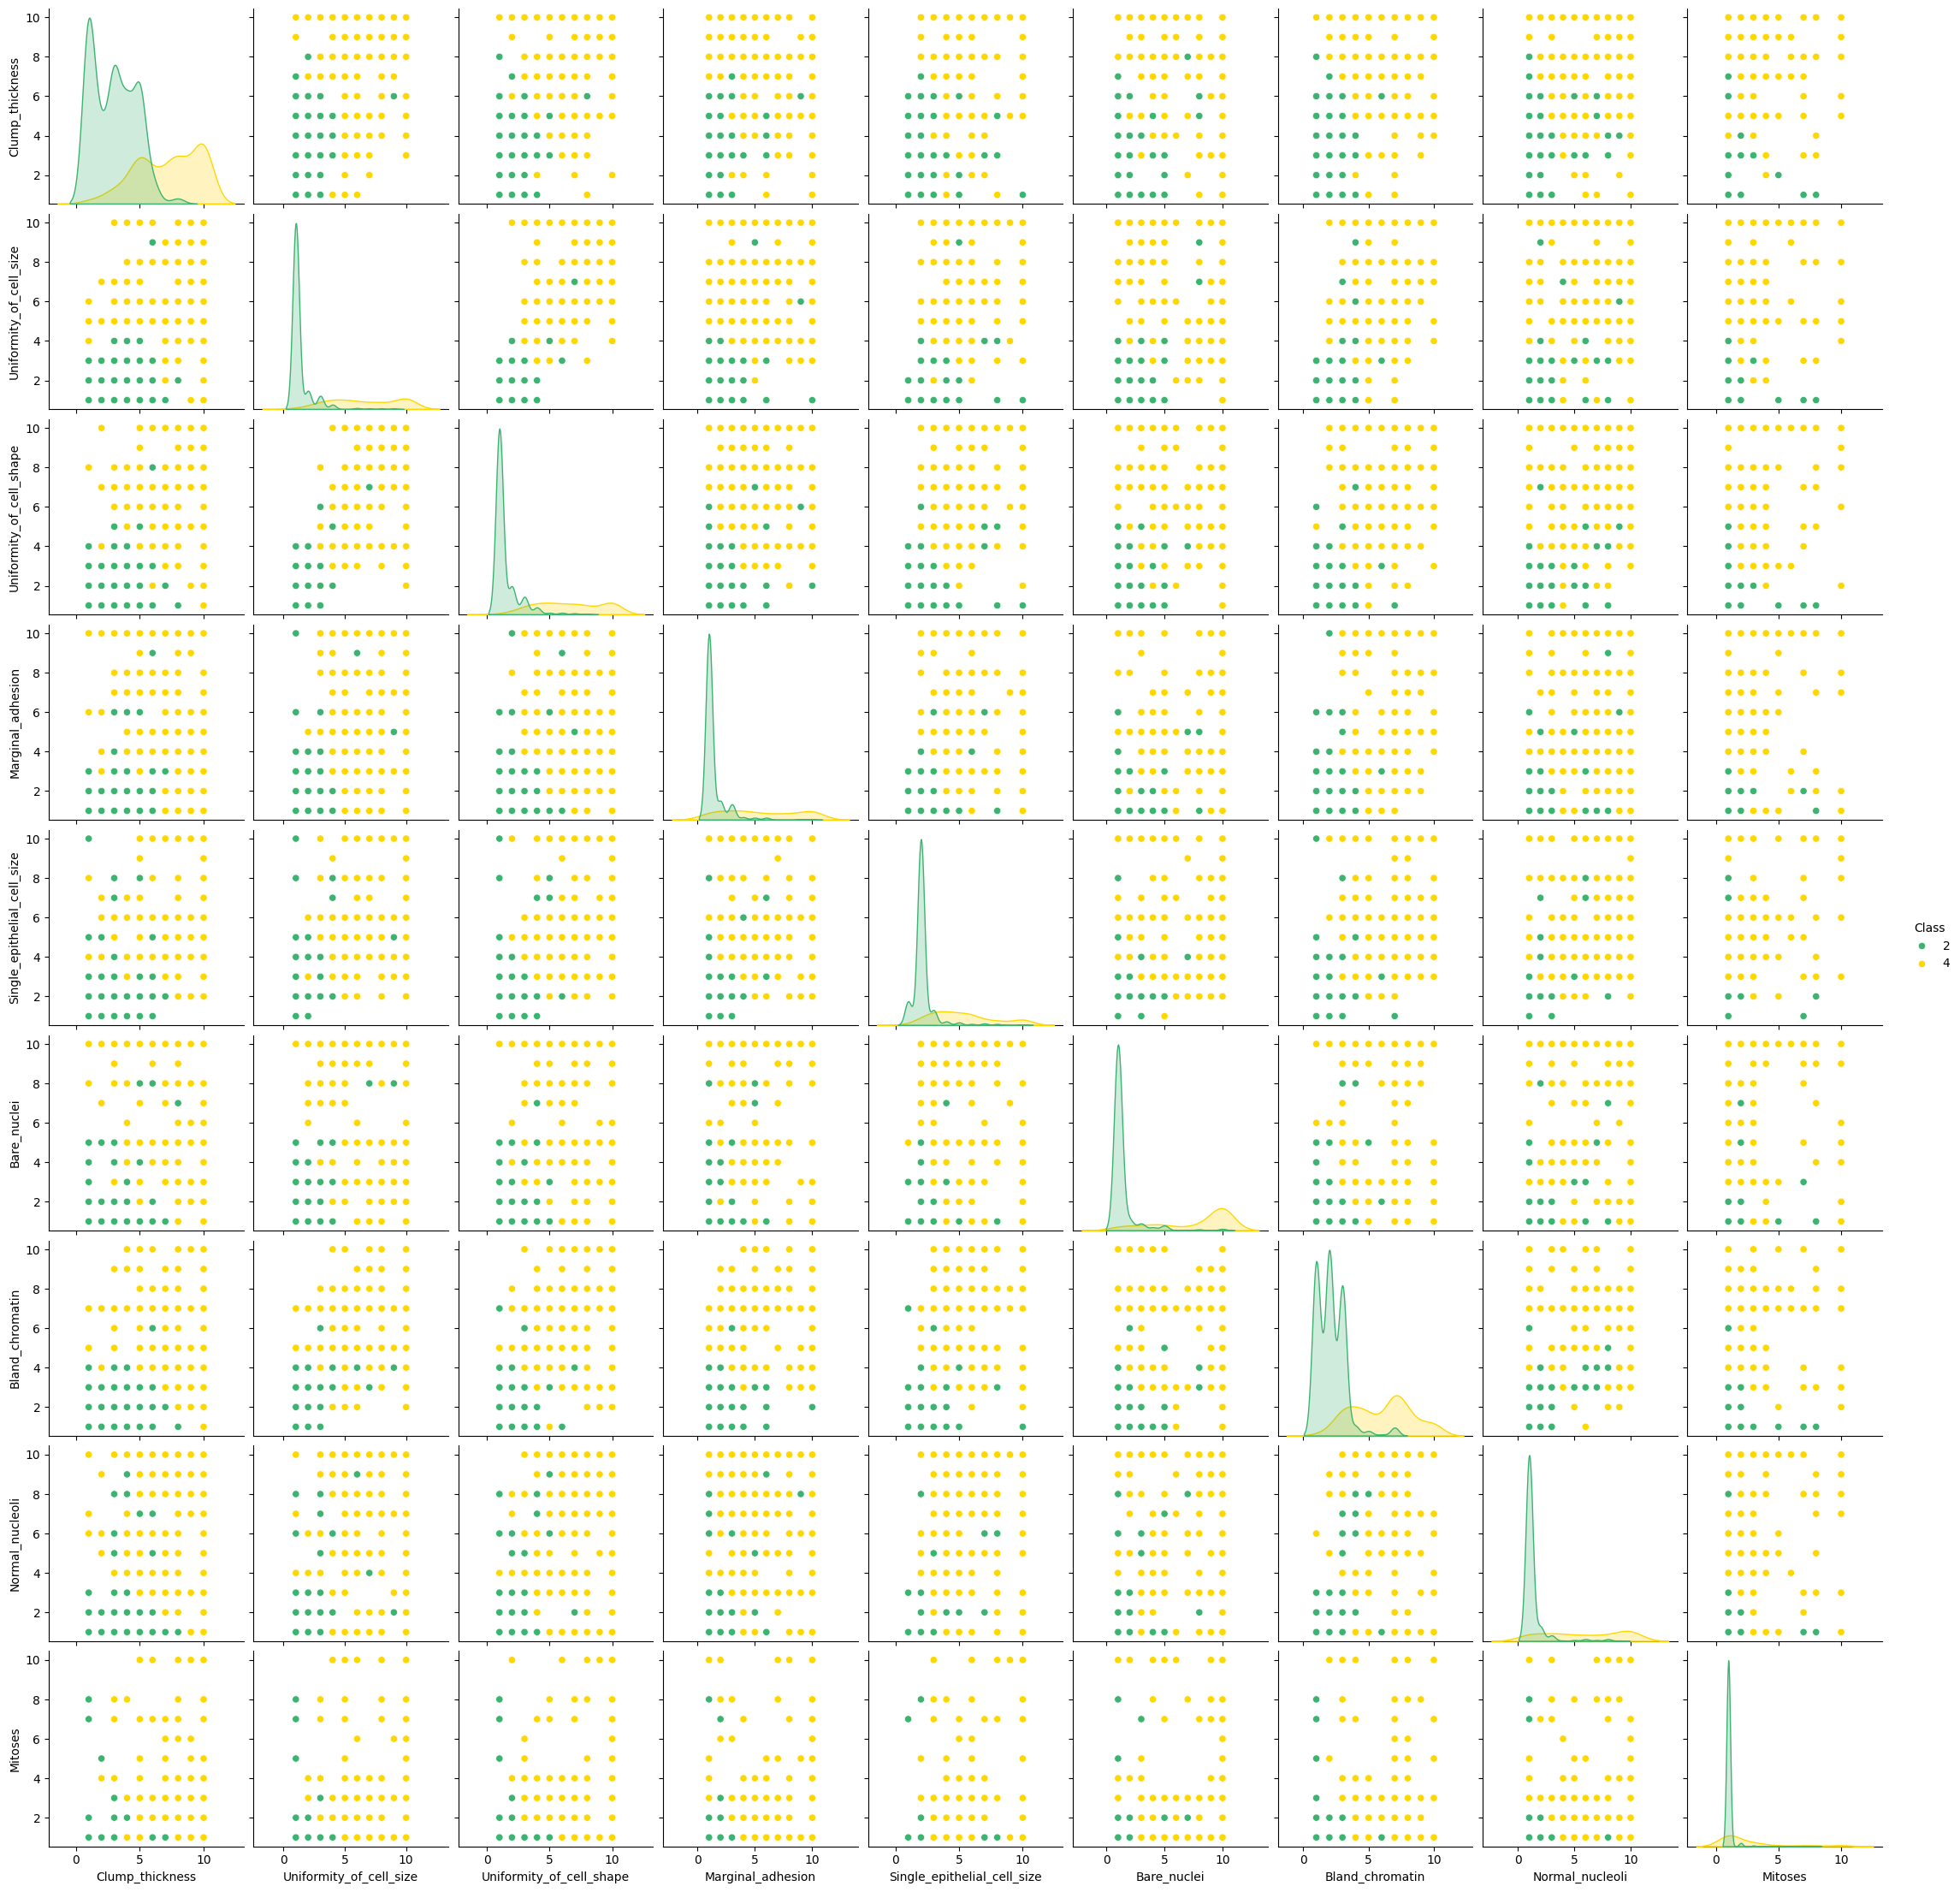

In [9]:
seaborn.pairplot(bcancer_df, hue ='Class', palette=['mediumseagreen', 'gold'])
print('Breast Cancer Pairplot\n')
plt.show()

In [10]:
bcancer_df.groupby(bcancer_df['Class']).describe()

Clump_thickness                                                 \
                count      mean       std  min  25%  50%   75%   max   
Class                                                                  
2               458.0  2.956332  1.674318  1.0  1.0  3.0   4.0   8.0   
4               241.0  7.195021  2.428849  1.0  5.0  8.0  10.0  10.0   

      Uniformity_of_cell_size            ... Normal_nucleoli       Mitoses  \
                        count      mean  ...             75%   max   count   
Class                                    ...                                 
2                       458.0  1.325328  ...             1.0   9.0   458.0   
4                       241.0  6.572614  ...            10.0  10.0   241.0   

                                                     
           mean       std  min  25%  50%  75%   max  
Class                                                
2      1.063319  0.501995  1.0  1.0  1.0  1.0   8.0  
4      2.589212  2.557939  1.0  1.0  1.0  3.0  10.0  

[2 rows x 72 columns]

In [11]:
bcancer_df.groupby(bcancer_df['Class']).apply(mean_sqrd_diff).drop('Class', axis=1)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
Class,,,,,,,,,
2,2.79722,0.822110,0.993502,0.991500,0.839291,1.384202,1.164585,1.118729,0.251449
4,5.87483,7.365059,6.536836,10.264321,5.985434,9.673045,5.148947,11.180420,6.515900


#### <b>1.3 Data Cleaning</b>

In [12]:
print(f'Missing values: {nhanes_df.isna().sum().sum()}')

Missing values: 0


In [13]:
print(f'Missing values: {bcancer_df.isna().sum().sum()}')
pd.DataFrame({'Features': bcancer_df.isna().sum().index, 'Missing values': bcancer_df.isna().sum().values})

Missing values: 16


,Features,Missing values
0,Clump_thickness,0
1,Uniformity_of_cell_size,0
2,Uniformity_of_cell_shape,0
3,Marginal_adhesion,0
4,Single_epithelial_cell_size,0
5,Bare_nuclei,16
6,Bland_chromatin,0
7,Normal_nucleoli,0
8,Mitoses,0
9,Class,0


In [14]:
bcancer_df.dropna(inplace=True)
print(f'Missing values after cleaning: {bcancer_df.isna().sum().sum()}')

Missing values after cleaning: 0


#### <b>1.4 Data Preprocessing</b>

In [15]:
# Preprocess NHANES, Adult -> 0 | Senior -> 1 

nhanes_df['age_group'] = nhanes_df['age_group'].apply(lambda x: 0 if x == 'Adult' else 1)
pd.DataFrame({'Class': nhanes_df['age_group'].value_counts().index, 'Count': nhanes_df['age_group'].value_counts().values})

,Class,Count
0,0,1914
1,1,364


In [16]:
# Preprocess Breast Cancer, 2 -> 0 | 4 -> 1 

bcancer_df['Class'] = bcancer_df['Class'].apply(lambda x: 0 if x == 2 else 1)
pd.DataFrame({'Class': bcancer_df['Class'].value_counts().index, 'Count': bcancer_df['Class'].value_counts().values})

,Class,Count
0,0,444
1,1,239


###  <font color='red'><b>Task 2: Implementing KNN and DT</b></font>

#### <b>2.1 K-Nearest Neighbour Implementation</b>

In [17]:
import numpy as np

import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

class KNN:
    def __init__(self, k=5, thresh=0.5, p=2, distance_func=None):
        self.k = k
        self.thresh = thresh
        self.p = p 
        self.distance_func = distance_func if distance_func else self.euclidean_distance
        self.Xtrain = None  # examplar-based (or instance-based) learner 
        self.ytrain = None

    def fit(self, Xtrain, ytrain):
        self.Xtrain = np.array(Xtrain)
        self.ytrain = np.array(ytrain)

    def predict(self, Xtest):
        prediction_proba = []
        for index in Xtest.index:
            if self.distance_func == self.cosine_similarity:
                similarities = self.distance_func(self.Xtrain, Xtest.loc[index].values)
                k_nearest_indices = np.argsort(similarities)[-self.k:]  # select 'k' most similar instances
            else:
                distances = self.distance_func(self.Xtrain, Xtest.loc[index].values)
                k_nearest_indices = np.argsort(distances)[:self.k]  # select 'k' nearest instances
    
            k_nearest_labels = self.ytrain[k_nearest_indices]  # fetch corresponding labels/class  
            proba = float(f'{list(k_nearest_labels).count(1)/len(k_nearest_labels):.2f}')  # probabilty of class being positive
            prediction_proba.append(proba) 
    
        predictions = list(map(lambda p: 1 if self.thresh < p else 0, prediction_proba))  # p(y=1/x) based on threshold 
        return predictions, prediction_proba

    @staticmethod
    def euclidean_distance(a, b):
        return np.linalg.norm(a - b, axis=1)

    @staticmethod
    def manhattan_distance(a, b):
        return np.sum(np.abs(a - b), axis=1)

    @staticmethod
    def cosine_similarity(a, b):
        dot_product = np.dot(a, b.T)
        norm_a = np.linalg.norm(a, axis=1)
        norm_b = np.linalg.norm(b)
        return dot_product / (norm_a * norm_b)

    def minkowski_distance(self, a, b, p=2):  
        return np.power(np.sum(np.power(np.abs(a - b), p), axis=1), 1 / p)

#### <b>2.2 Decision Tree Implementation</b>

In [18]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        if parent:
            self.depth = parent.depth + 1
            self.num_classes = parent.num_classes
            self.data = parent.data
            self.labels = parent.labels
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes)
            self.class_prob = class_prob / np.sum(class_prob)

def greedy_test(node, cost_fn):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]
    return -np.sum(class_probs * np.log2(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances

    def fit(self, data, labels):
        self.data = np.array(data)
        self.labels = np.array(labels)
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1

        _, num_features = data.shape
        self.feature_count = np.zeros(num_features)
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = np.array(data)
        self.root.labels = np.array(labels)
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        self.feature_count[split_feature] = self.feature_count[split_feature]+1
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):
        data_test = np.array(data_test)
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs

#### <b>Data Splitting: train, validation & test sets</b>
Note: We use <b>stratified sampling</b> to preserve class distribution

In [19]:
from sklearn.model_selection import train_test_split

# Split for NHANES (train, validate and test)
nhanes_X, nhanes_Xtest, nhanes_y, nhanes_ytest = train_test_split(
    nhanes_df[nhanes_df.columns[:-1]], nhanes_df['age_group'], test_size=0.20, stratify=nhanes_df['age_group'], random_state=SEED)

nhanes_Xtrain, nhanes_Xvalidate, nhanes_ytrain, nhanes_yvalidate = train_test_split(
    nhanes_X, nhanes_y, test_size=0.25, stratify=nhanes_y, random_state=SEED)

# Split for Breast Cancer (train, validate and test)
bcancer_X, bcancer_Xtest, bcancer_y, bcancer_ytest = train_test_split(
    bcancer_df[bcancer_df.columns[:-1]], bcancer_df['Class'], test_size=0.20, stratify=bcancer_df['Class'], random_state=SEED)

bcancer_Xtrain, bcancer_Xvalidate, bcancer_ytrain, bcancer_yvalidate = train_test_split(
    bcancer_X, bcancer_y, test_size=0.25, stratify=bcancer_y, random_state=SEED)

print(f'NHANES\n\ttraining samples:  {len(nhanes_Xtrain)}/{len(nhanes_df)}\n\tvalidation samples: {len(nhanes_Xvalidate)}/{len(nhanes_df)}\n\ttesting samples:    {len(nhanes_Xtest)}/{len(nhanes_df)}\n')
print(f'Breast Cancer\n\ttraining samples:   {len(bcancer_Xtrain)}/{len(bcancer_df)}\n\tvalidation samples: {len(bcancer_Xvalidate)}/{len(bcancer_df)}\n\ttesting samples:    {len(bcancer_Xtest)}/{len(bcancer_df)}')

NHANES
	training samples:  1366/2278
	validation samples: 456/2278
	testing samples:    456/2278

Breast Cancer
	training samples:   409/683
	validation samples: 137/683
	testing samples:    137/683


### <font color='red'><b>Task 3: Running experiments</b></font>

#### <b>Function</b> <code>evaluate_acc</code> <b>for computing Model Accuracy</b> 

In [20]:
def evaluate_acc(y_true, y_pred):
    y_true = list(y_true)
    corr_predictions = 0
    for i in range(len(y_true)):
         if y_true[i] == y_pred[i]:
             corr_predictions = corr_predictions + 1
    return float(f'{corr_predictions/len(y_true):2f}')

#### <b>KNN Evaluation</b>

1. KNN NHANES accuracy on validation set: 0.86
2. KNN NHANES f1-score on validation set: 0.34

3. KNN NHANES confusion table for validation set


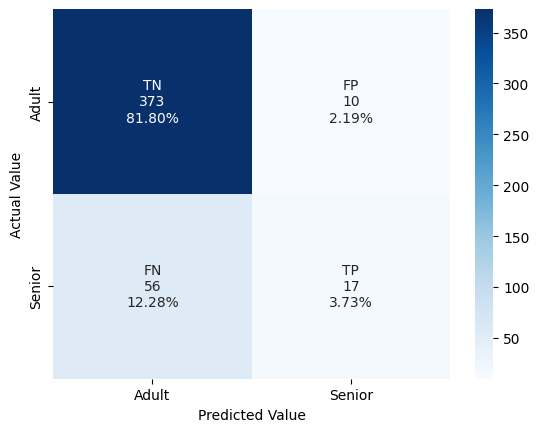


4. KNN NHANES ROC on validation set


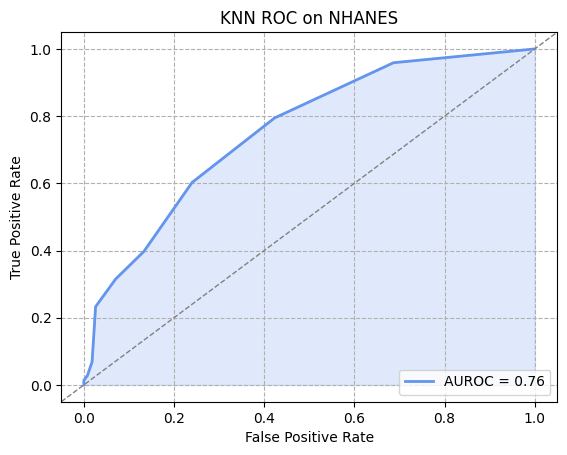

In [21]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score

# NHANES KNN

knn_nhanes = KNN(k=11)
knn_nhanes.fit(Xtrain=nhanes_Xtrain, ytrain=nhanes_ytrain)
knn_predictions_nhanes, knn_predictions_proba_nhanes = knn_nhanes.predict(Xtest=nhanes_Xvalidate)

def plot_confusion_table(cm, class_label, cmap='Blues'):
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(['TN','FP','FN','TP'], 
             ["{0:0.0f}".format(value) for value in cm.flatten()], ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)])]
    labels = np.asarray(labels).reshape(2,2)
    seaborn.heatmap(cm, annot=labels, fmt="", xticklabels=class_label, yticklabels=class_label, cmap=cmap)
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.show()

nhanes_f1 = f1_score(y_pred=knn_predictions_nhanes, y_true=nhanes_yvalidate)
nhanes_acc = evaluate_acc(y_pred=knn_predictions_nhanes, y_true=nhanes_yvalidate)
nhanes_cm = confusion_matrix(y_pred=knn_predictions_nhanes, y_true=nhanes_yvalidate)

print(f'1. KNN NHANES accuracy on validation set: {nhanes_acc:.2f}')
print(f'2. KNN NHANES f1-score on validation set: {nhanes_f1:.2f}')
print('\n3. KNN NHANES confusion table for validation set')
plot_confusion_table(cm=nhanes_cm, class_label=['Adult', 'Senior'])

fpr, tpr, thresholds = roc_curve(nhanes_yvalidate, knn_predictions_proba_nhanes)
roc_auc = roc_auc_score(nhanes_yvalidate, knn_predictions_proba_nhanes)
plt.clf()
plt.plot(fpr, tpr, lw=2, label="AUROC = %0.2f"%roc_auc, color='cornflowerblue')
plt.fill_between(fpr, tpr, color='cornflowerblue', alpha=0.2)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC on NHANES')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
print('\n4. KNN NHANES ROC on validation set')
plt.show()

1. KNN NHANES accuracy on test set: 0.84
2. KNN NHANES f1-score on test set: 0.21

3. KNN NHANES confusion table for test set


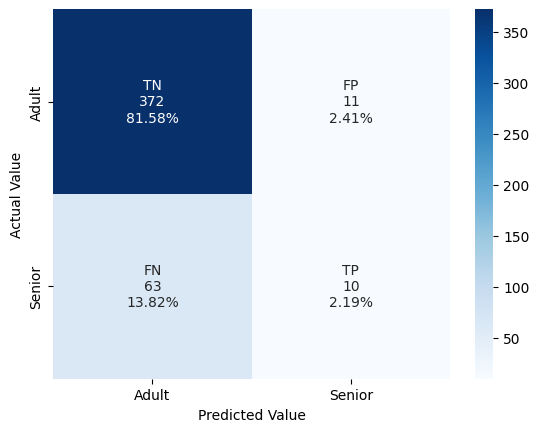


4. KNN HHANES ROC on test set


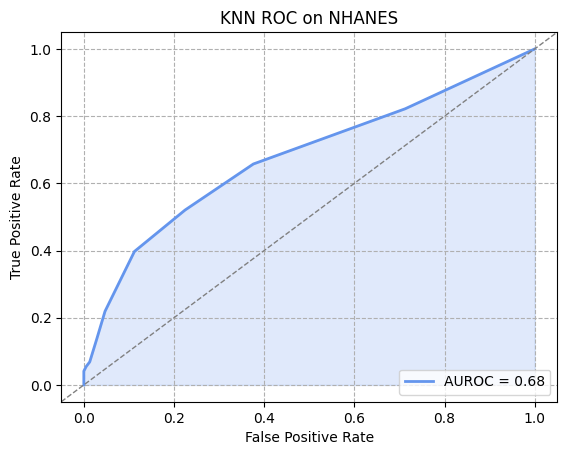

In [22]:
# KNN evaluation on testing-set for NHANES

knn_nhanes = KNN(k=11) # K tuned using Validation set
knn_nhanes.fit(Xtrain=nhanes_Xtrain, ytrain=nhanes_ytrain)
knn_predictions_nhanes, knn_predictions_proba_nhanes = knn_nhanes.predict(Xtest=nhanes_Xtest)

nhanes_f1 = f1_score(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)
nhanes_acc = evaluate_acc(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)
nhanes_cm = confusion_matrix(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)

print(f'1. KNN NHANES accuracy on test set: {nhanes_acc:.2f}')
print(f'2. KNN NHANES f1-score on test set: {nhanes_f1:.2f}')
print('\n3. KNN NHANES confusion table for test set')
plot_confusion_table(cm=nhanes_cm, class_label=['Adult', 'Senior'])

fpr, tpr, thresholds = roc_curve(nhanes_ytest, knn_predictions_proba_nhanes)
roc_auc = roc_auc_score(nhanes_ytest, knn_predictions_proba_nhanes)
plt.clf()
plt.plot(fpr, tpr, lw=2, label="AUROC = %0.2f"%roc_auc, color='cornflowerblue')
plt.fill_between(fpr, tpr, color='cornflowerblue', alpha=0.2)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC on NHANES')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
print('\n4. KNN HHANES ROC on test set')
plt.show()

1. KNN Breast Cancer accuracy on validation set: 0.99
2. KNN Breast Cancer f1-score on validation set: 0.98

3. KNN Breast Cancer confusion table


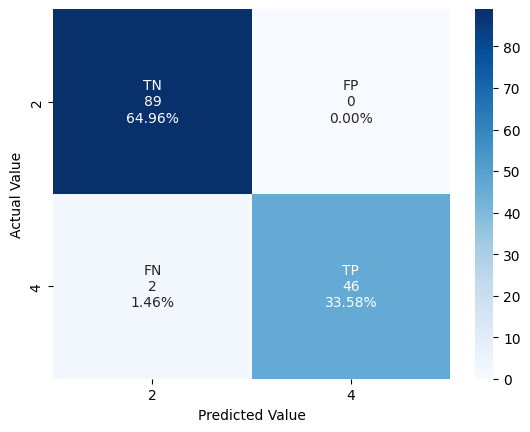


4. KNN Breast Cancer ROC on validation set


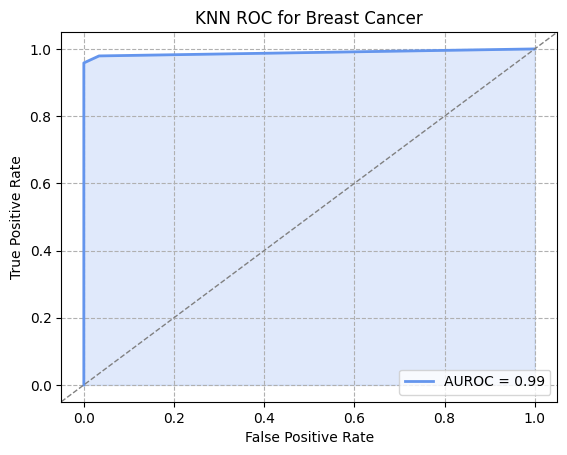

In [23]:
# KNN Breast Cancer

knn_bcancer = KNN(k=5)
knn_bcancer.fit(Xtrain=bcancer_Xtrain, ytrain=bcancer_ytrain)
knn_predictions_bcancer, knn_predictions_proba_bcancer = knn_bcancer.predict(Xtest=bcancer_Xvalidate)

bcancer_f1 = f1_score(y_pred=knn_predictions_bcancer, y_true=bcancer_yvalidate)
bcancer_acc = evaluate_acc(y_pred=knn_predictions_bcancer, y_true=bcancer_yvalidate)
bcancer_cm = confusion_matrix(y_pred=knn_predictions_bcancer, y_true=bcancer_yvalidate)

print(f'1. KNN Breast Cancer accuracy on validation set: {bcancer_acc:.2f}')
print(f'2. KNN Breast Cancer f1-score on validation set: {bcancer_f1:.2f}')
print('\n3. KNN Breast Cancer confusion table')
plot_confusion_table(cm=bcancer_cm, class_label=[2,4])

fpr, tpr, thresholds = roc_curve(bcancer_yvalidate, knn_predictions_proba_bcancer)
roc_auc = roc_auc_score(bcancer_yvalidate, knn_predictions_proba_bcancer)
plt.clf()
plt.plot(fpr, tpr, lw=2, label="AUROC = %0.2f"%roc_auc, color='cornflowerblue')
plt.fill_between(fpr, tpr, color='cornflowerblue', alpha=0.2)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC for Breast Cancer')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
print('\n4. KNN Breast Cancer ROC on validation set')
plt.show()

1. Breast Cancer accuracy on test set: 0.96
2. Breast Cancer f1-score on test set: 0.95

3. Breast Cancer confusion table


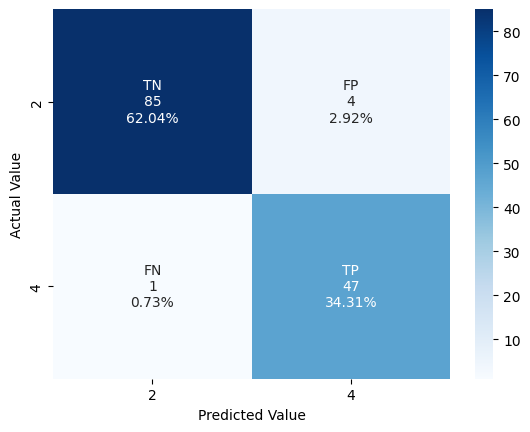


4. KNN Breast Cancer ROC on test set


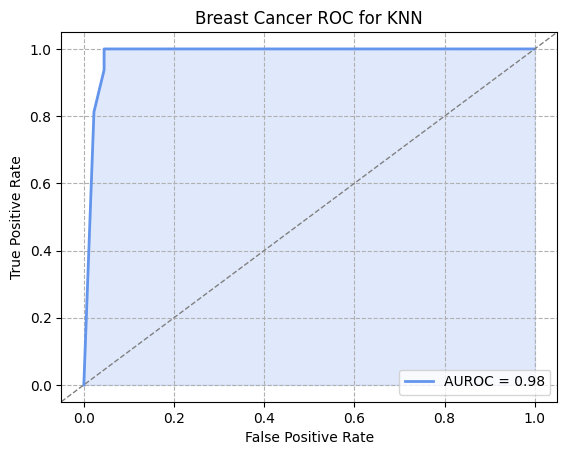

In [24]:
# KNN evaluation on testing-set for Breast Cancer

knn_bcancer = KNN(k=5)  # K uned using Validation set
knn_bcancer.fit(Xtrain=bcancer_Xtrain, ytrain=bcancer_ytrain)
knn_predictions_bcancer, knn_predictions_proba_bcancer = knn_bcancer.predict(Xtest=bcancer_Xtest)

bcancer_f1 = f1_score(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)
bcancer_acc = evaluate_acc(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)
bcancer_cm = confusion_matrix(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)

print(f'1. Breast Cancer accuracy on test set: {bcancer_acc:.2f}')
print(f'2. Breast Cancer f1-score on test set: {bcancer_f1:.2f}')
print('\n3. Breast Cancer confusion table')
plot_confusion_table(cm=bcancer_cm, class_label=[2,4])

fpr, tpr, thresholds = roc_curve(bcancer_ytest, knn_predictions_proba_bcancer)
roc_auc = roc_auc_score(bcancer_ytest, knn_predictions_proba_bcancer)
plt.clf()
plt.plot(fpr, tpr, lw=2, label="AUROC = %0.2f"%roc_auc, color='cornflowerblue')
plt.fill_between(fpr, tpr, color='cornflowerblue', alpha=0.2)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer ROC for KNN')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
print('\n4. KNN Breast Cancer ROC on test set')
plt.show()

#### <b>DT Evaluation</b>

NHANES confusion table


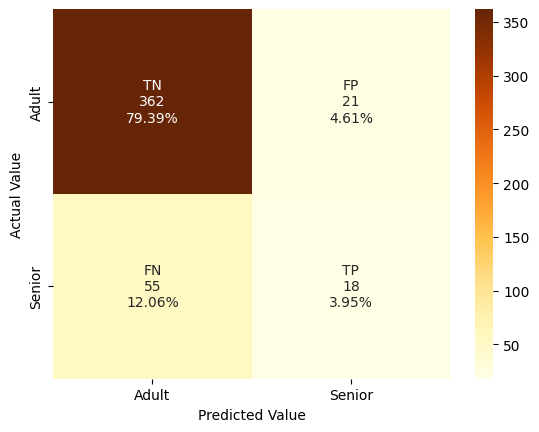

NHANES accuracy: 0.83
NHANES f1-score: 0.32


In [25]:
# NHANES DT

tree_nhanes = DecisionTree(max_depth=5)
probs_test = tree_nhanes.fit(nhanes_Xtrain, nhanes_ytrain).predict(nhanes_Xtest)
dt_y_pred_nhanes = np.argmax(probs_test, 1)

dt_predictions_proba_nhanes = []
for p in probs_test:
    dt_predictions_proba_nhanes.append(p[1])

nhanes_f1 = f1_score(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)
nhanes_acc = evaluate_acc(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)
nhanes_cm = confusion_matrix(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)

print('NHANES confusion table')
plot_confusion_table(cm=nhanes_cm, class_label=['Adult', 'Senior'], cmap='YlOrBr')
print(f'NHANES accuracy: {nhanes_acc:.2f}')
print(f'NHANES f1-score: {nhanes_f1:.2f}')

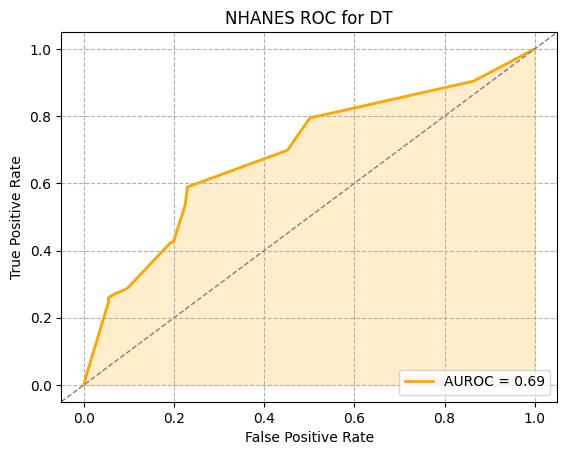

In [26]:
fpr, tpr, thresholds = roc_curve(nhanes_ytest, dt_predictions_proba_nhanes)
roc_auc = roc_auc_score(nhanes_ytest, dt_predictions_proba_nhanes)
plt.clf()
plt.plot(fpr, tpr, lw=2, label="AUROC = %0.2f"%roc_auc, color='orange')
plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NHANES ROC for DT')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.show()

Breast Cancer confusion table


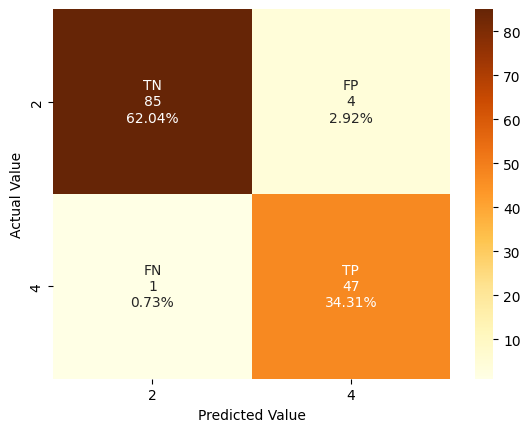

Breast Cancer f1-score: 0.95
Breast Cancer accuracy: 0.96


In [27]:
# Breast Cancer DT

tree_bcancer = DecisionTree(max_depth=5, cost_fn=cost_entropy)
probs_test = tree_bcancer.fit(bcancer_Xtrain, bcancer_ytrain).predict(bcancer_Xtest)
dt_y_pred_bcancer = np.argmax(probs_test, 1)

dt_predictions_proba_bcancer = []
for p in probs_test:
    dt_predictions_proba_bcancer.append(p[1])

bcancer_f1 = f1_score(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)
bcancer_acc = evaluate_acc(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)
bcancer_cm = confusion_matrix(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)

print('Breast Cancer confusion table')
plot_confusion_table(cm=bcancer_cm, class_label=[2,4], cmap='YlOrBr')
print(f'Breast Cancer f1-score: {bcancer_f1:.2f}')
print(f'Breast Cancer accuracy: {bcancer_acc:.2f}')

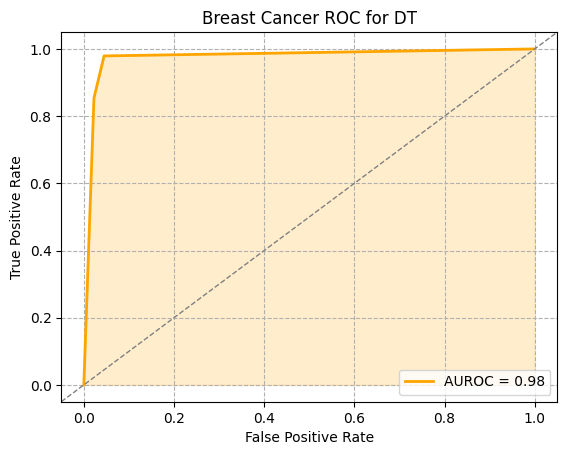

In [28]:
fpr, tpr, thresholds = roc_curve(bcancer_ytest, dt_predictions_proba_bcancer)
roc_auc = roc_auc_score(bcancer_ytest, dt_predictions_proba_bcancer)
plt.clf()
plt.plot(fpr, tpr, lw=2, label="AUROC = %0.2f"%roc_auc, color='orange')
plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer ROC for DT')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.show()

#### <b>3.1.1 KNN vs. Decision Tree w.r.t Testing <font color='red'>accuracy</font></b>

(a) NHANES

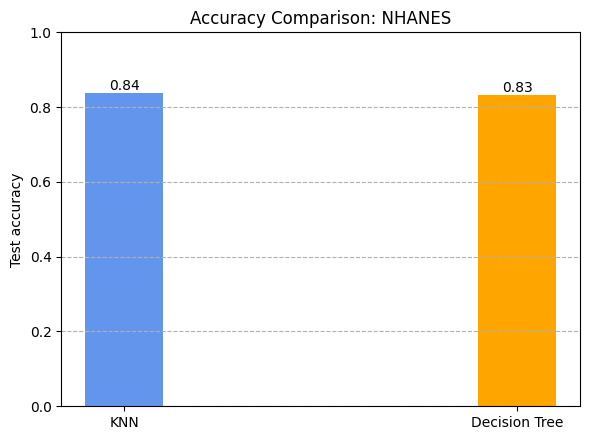

In [29]:
knn_nhanes_acc = evaluate_acc(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)
dt_nhanes_acc = evaluate_acc(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)

plt.figure(figsize=(6, 4.5))
bars = plt.bar(['KNN', 'Decision Tree'], [knn_nhanes_acc, dt_nhanes_acc], color=['cornflowerblue', 'orange'], width=0.20)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.ylim(top=1.0)
plt.ylabel('Test accuracy')
plt.title('Accuracy Comparison: NHANES')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

(b) Breast Cancer

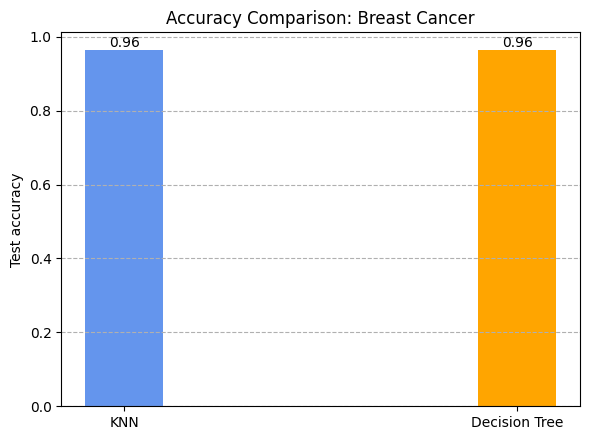

In [30]:
knn_bcancer_acc = evaluate_acc(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)
dt_bcancer_acc = evaluate_acc(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)

plt.figure(figsize=(6, 4.5))
bars = plt.bar(['KNN', 'Decision Tree'], [knn_bcancer_acc, dt_bcancer_acc], color=['cornflowerblue', 'orange'], width=0.20)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.ylabel('Test accuracy')
plt.title('Accuracy Comparison: Breast Cancer')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### <b>3.1.2 KNN vs. Decision Tree w.r.t <font color='red'>AUROC</b></font>

(a) NHANES

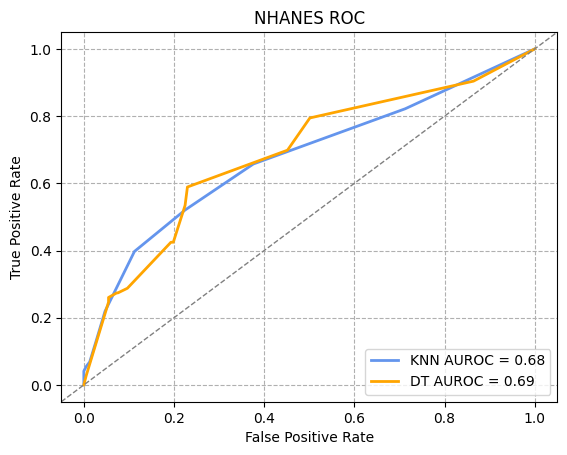

In [31]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(nhanes_ytest, dt_predictions_proba_nhanes)
roc_auc_dt = roc_auc_score(nhanes_ytest, dt_predictions_proba_nhanes)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(nhanes_ytest, knn_predictions_proba_nhanes)
roc_auc_knn = roc_auc_score(nhanes_ytest, knn_predictions_proba_nhanes)

plt.plot(fpr_knn, tpr_knn, lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn, color='cornflowerblue')
plt.plot(fpr_dt, tpr_dt, lw=2, label="DT AUROC = %0.2f"%roc_auc_dt, color='orange')

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NHANES ROC')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.show()

(b) Breast Cancer

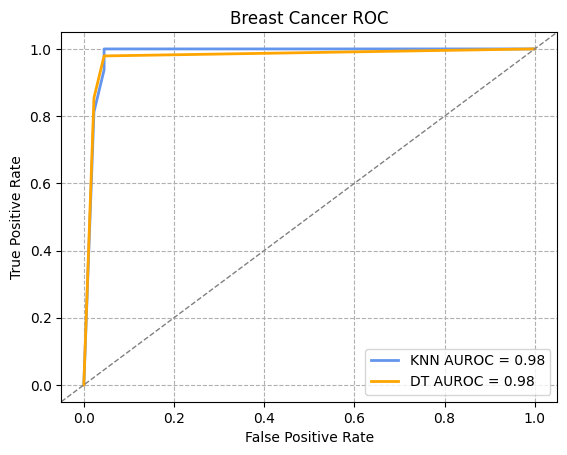

In [32]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(bcancer_ytest, dt_predictions_proba_bcancer)
roc_auc_dt = roc_auc_score(bcancer_ytest, dt_predictions_proba_bcancer)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(bcancer_ytest, knn_predictions_proba_bcancer)
roc_auc_knn = roc_auc_score(bcancer_ytest, knn_predictions_proba_bcancer)

plt.plot(fpr_knn, tpr_knn, lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn, color='cornflowerblue')
plt.plot(fpr_dt, tpr_dt, lw=2, label="DT AUROC = %0.2f"%roc_auc_dt, color='orange')

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer ROC')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.show()

#### <b>3.2 Comparing training and testing accuracy of KNN over different values of K</b>

(a) NHANES

  0%|          | 0/228 [00:00<?, ?it/s]

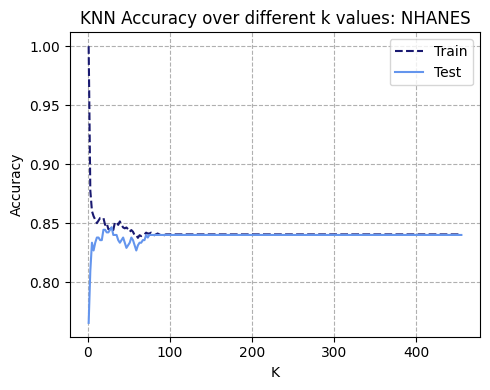

In [33]:
from tqdm.notebook import tqdm

k_values = [i for i in range(1, len(nhanes_Xtest)+1, 2)]
nhanes_test_acc_over_k = {}
nhanes_train_acc_over_k = {}

for k in tqdm(k_values):
    knn = KNN(k=k)
    knn.fit(Xtrain=nhanes_Xtrain, ytrain=nhanes_ytrain)
    pred_train, _ = knn.predict(Xtest=nhanes_Xtrain)
    pred_test, _ = knn.predict(Xtest=nhanes_Xtest)
    nhanes_test_acc_over_k[k] = evaluate_acc(y_pred=pred_test, y_true=nhanes_ytest)
    nhanes_train_acc_over_k[k] = evaluate_acc(y_pred=pred_train, y_true=nhanes_ytrain)

test_acc_values = list(nhanes_test_acc_over_k.values())
train_acc_values = list(nhanes_train_acc_over_k.values())

plt.figure(figsize=(5, 4))

plt.plot(nhanes_test_acc_over_k.keys(), train_acc_values, label='Train', color='midnightblue', linestyle='--')
plt.plot(nhanes_test_acc_over_k.keys(), test_acc_values, label='Test', color='cornflowerblue', linestyle='solid')

plt.title('KNN Accuracy over different k values: NHANES')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

(b) Breast Cancer

  0%|          | 0/69 [00:00<?, ?it/s]

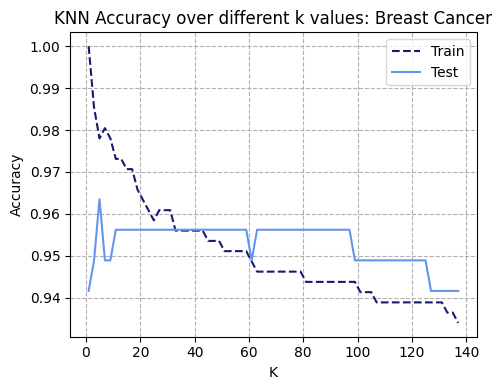

In [34]:
k_values = [i for i in range(1, len(bcancer_Xtest)+1, 2)]
bcancer_test_acc_over_k = {}
bcancer_train_acc_over_k = {}

for k in tqdm(k_values):
    knn = KNN(k=k)
    knn.fit(Xtrain=bcancer_Xtrain, ytrain=bcancer_ytrain)
    pred_train, _ = knn.predict(Xtest=bcancer_Xtrain)
    pred_test, _ = knn.predict(Xtest=bcancer_Xtest)
    bcancer_test_acc_over_k[k] = evaluate_acc(y_pred=pred_test, y_true=bcancer_ytest)
    bcancer_train_acc_over_k[k] = evaluate_acc(y_pred=pred_train, y_true=bcancer_ytrain)

test_acc_values = list(bcancer_test_acc_over_k.values())
train_acc_values = list(bcancer_train_acc_over_k.values())

plt.figure(figsize=(5, 4))

plt.plot(bcancer_test_acc_over_k.keys(), train_acc_values, label='Train', color='midnightblue', linestyle='--')
plt.plot(bcancer_test_acc_over_k.keys(), test_acc_values, label='Test', color='cornflowerblue', linestyle='solid')

plt.title('KNN Accuracy over different k values: Breast Cancer')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

#### <b>3.3 DT Maximum Depth performance analysis</b>

(a) NHANES

  0%|          | 0/19 [00:00<?, ?it/s]

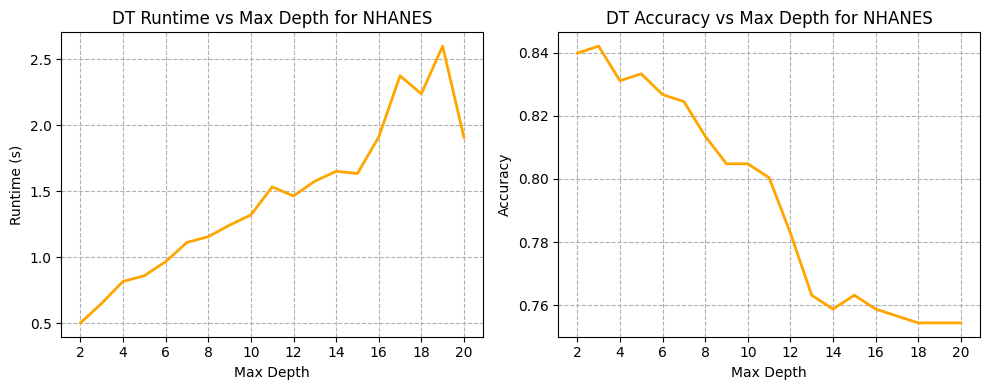

In [35]:
import time
from matplotlib.ticker import MaxNLocator

DEPTH_TO_TEST = 20

nhanes_rt = []
nhanes_acc = []

for i in tqdm(range(2, DEPTH_TO_TEST+1)):
    startTime = time.time()
    tree = DecisionTree(max_depth=i)
    probs_test = tree.fit(nhanes_Xtrain, nhanes_ytrain).predict(nhanes_Xtest)
    endTime = time.time()
    dt_y_pred_nhanes = np.argmax(probs_test, 1)
    accuracy = evaluate_acc(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)
    nhanes_rt.append(endTime - startTime)
    nhanes_acc.append(accuracy)

depths = list(range(2, DEPTH_TO_TEST+1))
plt.figure(figsize=(10,4))
plt.subplot(121).plot(depths, nhanes_rt, color='orange', linewidth=2)
plt.title('DT Runtime vs Max Depth for NHANES')
plt.xlabel("Max Depth")
plt.ylabel("Runtime (s)")
plt.grid(linestyle='--')
plt.tight_layout()
plt.subplot(121).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.subplot(122).plot(depths, nhanes_acc, color='orange', linewidth=2)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("DT Accuracy vs Max Depth for NHANES")
plt.subplot(122).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

(b) Breast Cancer

  0%|          | 0/19 [00:00<?, ?it/s]

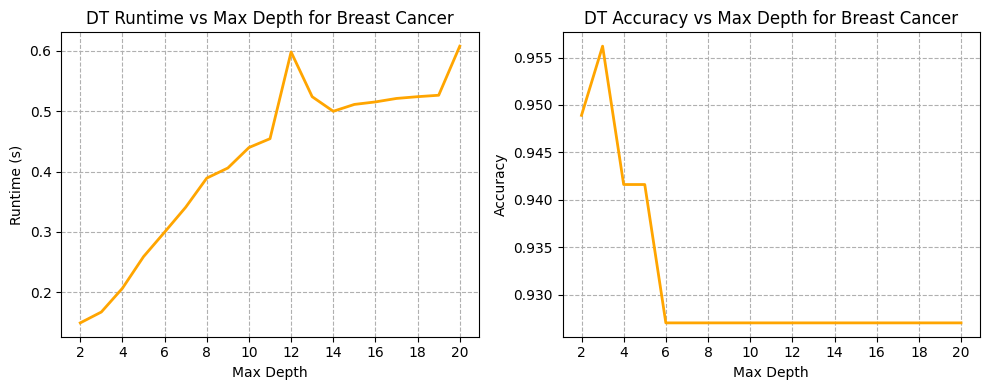

In [36]:
bc_rt = []
bc_acc = []

for i in tqdm(range(2, DEPTH_TO_TEST+1)):
    startTime = time.time()
    tree = DecisionTree(max_depth=i)
    probs_test = tree.fit(bcancer_Xtrain, bcancer_ytrain).predict(bcancer_Xtest)
    endTime = time.time()
    dt_y_pred_bcancer = np.argmax(probs_test, 1)
    accuracy = evaluate_acc(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)
    bc_rt.append(endTime - startTime)
    bc_acc.append(accuracy)

depths = list(range(2, DEPTH_TO_TEST+1))
plt.figure(figsize=(10, 4))
plt.subplot(121).plot(depths, bc_rt, color='orange', linewidth=2)
plt.title('DT Runtime vs Max Depth for Breast Cancer')
plt.xlabel("Max Depth")
plt.ylabel("Runtime (s)")
plt.grid(linestyle='--')
plt.tight_layout()
plt.subplot(121).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.subplot(122).plot(depths, bc_acc, color='orange', linewidth=2)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("DT Accuracy vs Max Depth for Breast Cancer")
plt.subplot(122).xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

#### <b>3.4.1 Evaluating different distance/cost functions for <font color='red'>KNN</font></b>

(a) NHANES

0it [00:00, ?it/s]

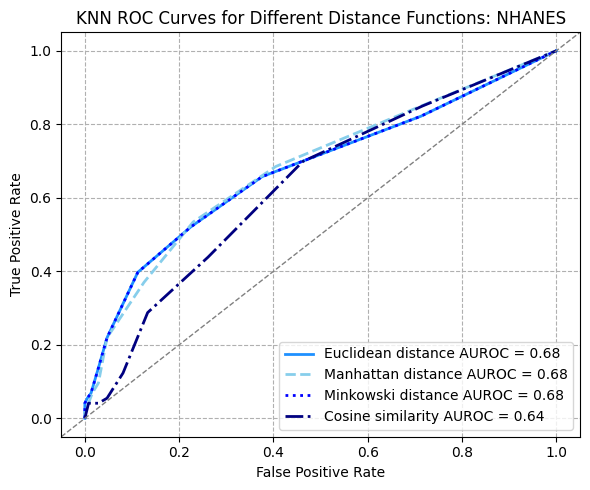

In [37]:
distance_functions = [KNN().euclidean_distance, KNN().manhattan_distance, KNN().minkowski_distance, KNN().cosine_similarity]
test_proba_for_distance_functions = {}

plt.figure(figsize=(6, 5))

for distance_function, color, linestyle in tqdm(zip(distance_functions, ['dodgerblue', 'skyblue', 'blue', 'navy'], ['solid', 'dashed', 'dotted', 'dashdot'])):
    knn = KNN(k=11, distance_func=distance_function)
    knn.fit(Xtrain=nhanes_Xtrain, ytrain=nhanes_ytrain)
    _, test_proba = knn.predict(Xtest=nhanes_Xtest)
    test_proba_for_distance_functions[distance_function] = test_proba
    fpr, tpr, thresholds = roc_curve(nhanes_ytest, test_proba)
    roc_auc = roc_auc_score(nhanes_ytest, test_proba)  
    plt.plot(fpr, tpr, lw=2, label=f"{(distance_function.__name__).replace('_', ' ').capitalize()} AUROC = {roc_auc:.2f}", color=color, linestyle=linestyle)

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curves for Different Distance Functions: NHANES')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

(b) Breast Cancer

0it [00:00, ?it/s]

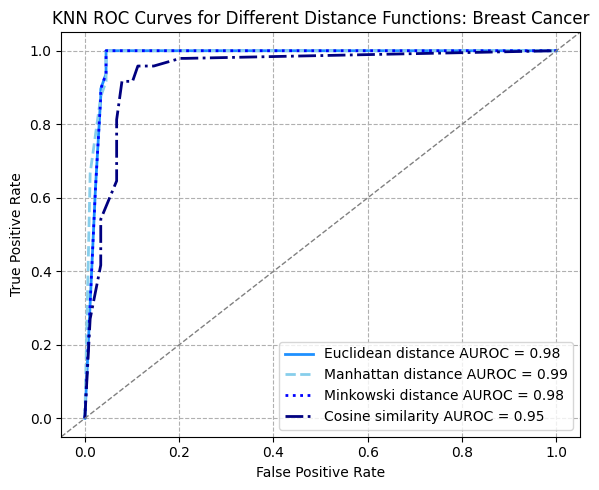

In [38]:
distance_functions = [KNN().euclidean_distance, KNN().manhattan_distance, KNN().minkowski_distance, KNN().cosine_similarity]
test_proba_for_distance_functions = {}

plt.figure(figsize=(6, 5))

for distance_function, color, linestyle in tqdm(zip(distance_functions, ['dodgerblue', 'skyblue', 'blue', 'navy'], ['solid', 'dashed', 'dotted', 'dashdot'])):
    knn = KNN(k=11, distance_func=distance_function)
    knn.fit(Xtrain=bcancer_Xtrain, ytrain=bcancer_ytrain)
    _, test_proba = knn.predict(Xtest=bcancer_Xtest)
    test_proba_for_distance_functions[distance_function] = test_proba
    fpr, tpr, thresholds = roc_curve(bcancer_ytest, test_proba)
    roc_auc = roc_auc_score(bcancer_ytest, test_proba)  
    plt.plot(fpr, tpr, lw=2, label=f"{(distance_function.__name__).replace('_', ' ').capitalize()} AUROC = {roc_auc:.2f}", color=color, linestyle=linestyle)

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curves for Different Distance Functions: Breast Cancer')
plt.legend(loc="best")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

#### <b>3.4.2 Evaluating different distance/cost functions for <font color='red'>Decision Tree</font></b>

(a) NHANES

0it [00:00, ?it/s]

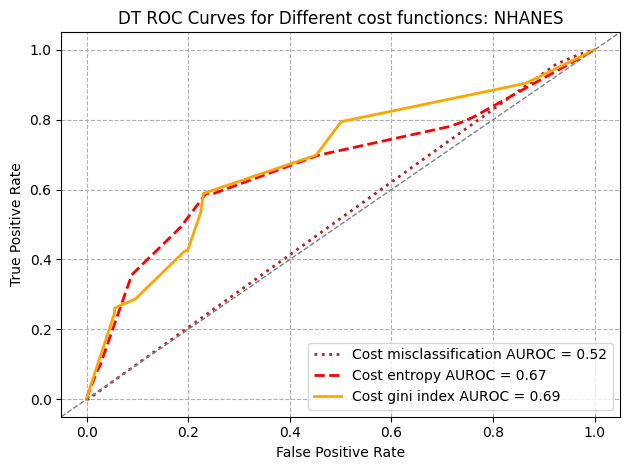

In [39]:
cost_functions = [cost_misclassification, cost_entropy, cost_gini_index] 

for cost_function, color, linestyle in tqdm(zip(cost_functions, ['firebrick', 'red', 'orange'], ['dotted', 'dashed', 'solid'])):
    tree = DecisionTree(max_depth=5, cost_fn=cost_function)
    probs_test = tree.fit(nhanes_Xtrain, nhanes_ytrain).predict(nhanes_Xtest)
    dt_y_pred_nhanes = np.argmax(probs_test, 1)
    dt_predictions_probs = []
    for p in probs_test:
        dt_predictions_probs.append(p[1])
    acc = evaluate_acc(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)
    fpr, tpr, thresholds = roc_curve(nhanes_ytest, dt_predictions_probs)
    roc_auc = roc_auc_score(nhanes_ytest, dt_predictions_probs)
    plt.plot(fpr, tpr, lw=2, label=f"{(cost_function.__name__).replace('_', ' ').capitalize()} AUROC = {roc_auc:.2f}", color=color, linestyle=linestyle)


plt.axline((0,0), (1,1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curves for Different cost functioncs: NHANES')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

(b) Breast Cancer

0it [00:00, ?it/s]

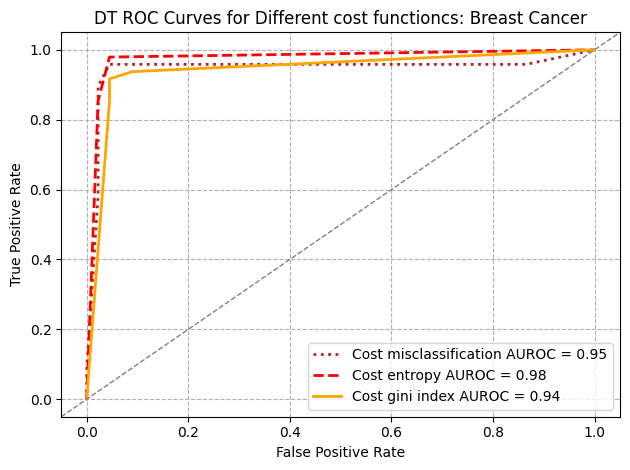

In [40]:
for cost_function, color, linestyle in tqdm(zip(cost_functions, ['firebrick', 'red', 'orange'], ['dotted', 'dashed', 'solid'])):
    tree = DecisionTree(max_depth=5, cost_fn=cost_function)
    probs_test = tree.fit(bcancer_Xtrain, bcancer_ytrain).predict(bcancer_Xtest)
    dt_y_pred_bcancer = np.argmax(probs_test, 1)
    dt_predictions_probs = []
    for p in probs_test:
        dt_predictions_probs.append(p[1])
    acc = evaluate_acc(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)
    fpr, tpr, thresholds = roc_curve(bcancer_ytest, dt_predictions_probs)
    roc_auc = roc_auc_score(bcancer_ytest, dt_predictions_probs)
    plt.plot(fpr, tpr, lw=2, label=f"{(cost_function.__name__).replace('_', ' ').capitalize()} AUROC = {roc_auc:.2f}", color=color, linestyle=linestyle)

plt.axline((0,0), (1,1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curves for Different cost functioncs: Breast Cancer')
plt.legend(loc="lower right")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

#### <b>3.5 ROC for KNN and Decision Tree on the test data </b>


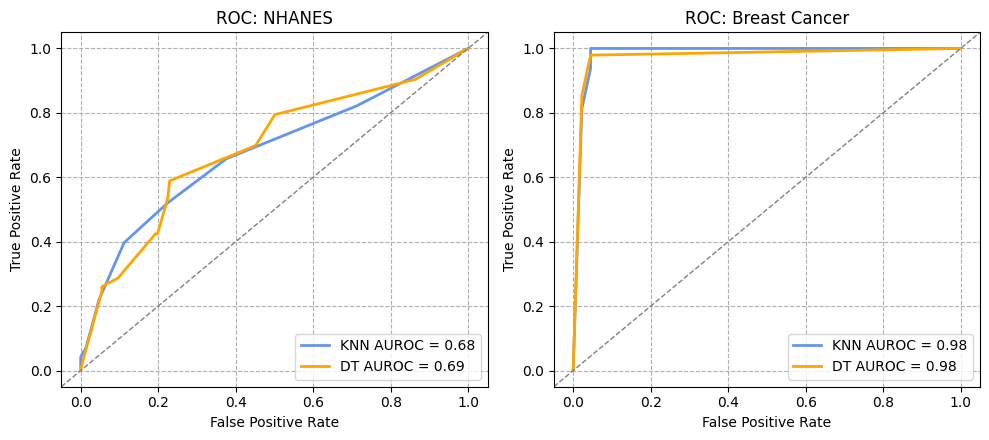

In [41]:
fpr_dt_nhanes, tpr_dt_nhanes, thresholds_dt_nhanes = roc_curve(nhanes_ytest, dt_predictions_proba_nhanes)
roc_auc_dt_nhanes = roc_auc_score(nhanes_ytest, dt_predictions_proba_nhanes)

fpr_knn_nhanes, tpr_knn_nhanes, thresholds_knn_nhanes = roc_curve(nhanes_ytest, knn_predictions_proba_nhanes)
roc_auc_knn_nhanes = roc_auc_score(nhanes_ytest, knn_predictions_proba_nhanes)

fpr_dt_bcancer, tpr_dt_bcancer, thresholds_dt_bcancer = roc_curve(bcancer_ytest, dt_predictions_proba_bcancer)
roc_auc_dt_bcancer = roc_auc_score(bcancer_ytest, dt_predictions_proba_bcancer)

fpr_knn_bcancer, tpr_knn_bcancer, thresholds_knn_bcancer = roc_curve(bcancer_ytest, knn_predictions_proba_bcancer)
roc_auc_knn_bcancer = roc_auc_score(bcancer_ytest, knn_predictions_proba_bcancer)

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

axes[0].plot(fpr_knn_nhanes, tpr_knn_nhanes, lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn_nhanes, color='cornflowerblue')
axes[0].plot(fpr_dt_nhanes, tpr_dt_nhanes, lw=2, label="DT AUROC = %0.2f"%roc_auc_dt_nhanes, color='orange')
axes[0].axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC: NHANES')
axes[0].grid(linestyle='--')
axes[0].legend(loc="lower right")

axes[1].plot(fpr_knn_bcancer, tpr_knn_bcancer, lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn_bcancer, color='cornflowerblue')
axes[1].plot(fpr_dt_bcancer, tpr_dt_bcancer, lw=2, label="DT AUROC = %0.2f"%roc_auc_dt_bcancer, color='orange')
axes[1].axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC: Breast Cancer')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.grid(linestyle='--')
plt.show()

#### <b>3.6 Feature Selection for KNN</b>
Note: We use <b>mutual information</b> to perform external feature selection

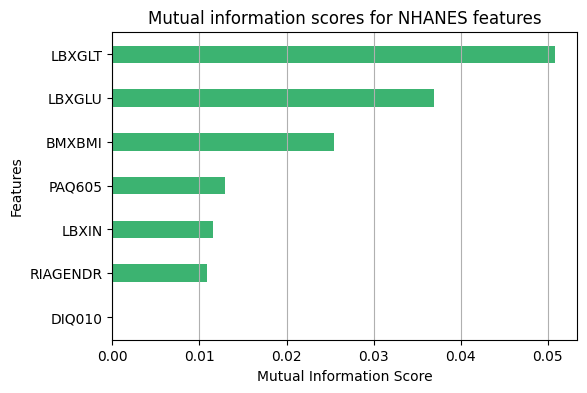

In [42]:
from sklearn.feature_selection import mutual_info_classif

# Mutual information for NHANES features
plt.figure(figsize=(6, 4))
mi_scores_nhanes = mutual_info_classif(nhanes_Xtrain, nhanes_ytrain, random_state=SEED)
mi_scores_nhanes = pd.DataFrame({'Feature': nhanes_Xtrain.columns, 'Mutual information': mi_scores_nhanes})
mi_scores_nhanes = mi_scores_nhanes.sort_values(by='Mutual information', ascending=True).reset_index(drop=True)
plt.barh(mi_scores_nhanes['Feature'], mi_scores_nhanes['Mutual information'], height=0.40, color='mediumseagreen')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual information scores for NHANES features')
plt.grid(axis='x')
plt.show()

  0%|          | 0/7 [00:00<?, ?it/s]

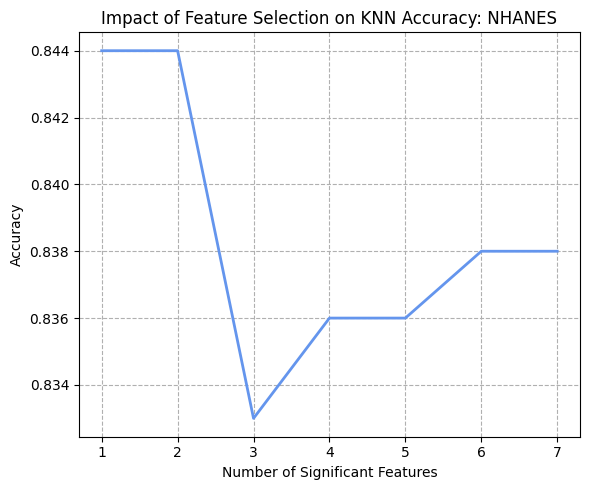

In [43]:
mi_scores_nhanes = mi_scores_nhanes.sort_values(by='Mutual information', ascending=False).reset_index(drop=True)
test_acc_nhanes = []

for n in tqdm(range(len(mi_scores_nhanes['Feature']))):
    n_significant_features = list(mi_scores_nhanes['Feature'])[:n+1]
    knn = KNN(k=11)
    knn.fit(Xtrain=nhanes_Xtrain[n_significant_features], ytrain=nhanes_ytrain)
    pred, _ = knn.predict(Xtest=nhanes_Xtest[n_significant_features])
    test_acc = evaluate_acc(y_pred=pred, y_true=nhanes_ytest)
    test_acc_nhanes.append(float(f'{test_acc:.3f}'))

plt.figure(figsize=(6, 5))
plt.plot(range(1, len(mi_scores_nhanes['Feature']) + 1), test_acc_nhanes, color='cornflowerblue', linewidth=2)
plt.xlabel('Number of Significant Features')
plt.ylabel('Accuracy')
plt.title('Impact of Feature Selection on KNN Accuracy: NHANES')
plt.grid(linestyle='--')
plt.tight_layout()

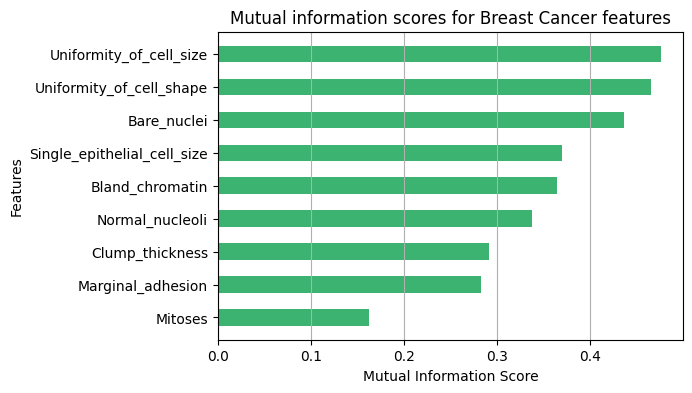

In [44]:
# Mutual information for Breast Cancer features
plt.figure(figsize=(6, 4))
mi_scores_bcancer = mutual_info_classif(bcancer_Xtrain, bcancer_ytrain, random_state=SEED)
mi_scores_bcancer = pd.DataFrame({'Feature': bcancer_Xtrain.columns, 'Mutual information': mi_scores_bcancer})
mi_scores_bcancer = mi_scores_bcancer.sort_values(by='Mutual information', ascending=True).reset_index(drop=True)
plt.barh(mi_scores_bcancer['Feature'], mi_scores_bcancer['Mutual information'], height=0.50, color='mediumseagreen')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual information scores for Breast Cancer features')
plt.grid(axis='x')
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

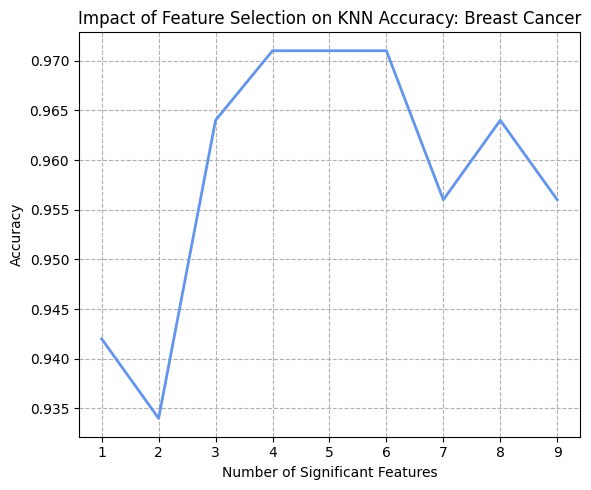

In [45]:
mi_scores_bcancer = mi_scores_bcancer.sort_values(by='Mutual information', ascending=False).reset_index(drop=True)
test_acc_bcancer = []

for n in tqdm(range(len(mi_scores_bcancer['Feature']))):
    n_significant_features = list(mi_scores_bcancer['Feature'])[:n+1]
    knn = KNN(k=11)
    knn.fit(Xtrain=bcancer_Xtrain[n_significant_features], ytrain=bcancer_ytrain)
    pred, _ = knn.predict(Xtest=bcancer_Xtest[n_significant_features])
    test_acc = evaluate_acc(y_pred=pred, y_true=bcancer_ytest)
    test_acc_bcancer.append(float(f'{test_acc:.3f}'))

plt.figure(figsize=(6, 5))
plt.plot(range(1, len(mi_scores_bcancer['Feature']) + 1), test_acc_bcancer, color='cornflowerblue', linewidth=2)
plt.xlabel('Number of Significant Features')
plt.ylabel('Accuracy')
plt.title('Impact of Feature Selection on KNN Accuracy: Breast Cancer')
plt.grid(linestyle='--')
plt.tight_layout()

#### <b>3.7 Feature Importance for DT</b>

a) NHANES

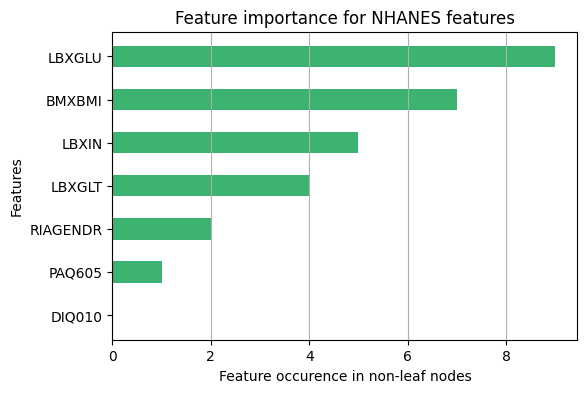

In [46]:
plt.figure(figsize=(6, 4))
fi_nhanes = pd.DataFrame({'Feature': nhanes_Xtrain.columns, 'Importance': tree_nhanes.feature_count})
fi_nhanes = fi_nhanes.sort_values(by='Importance', ascending=True).reset_index(drop=True)
plt.barh(fi_nhanes['Feature'], fi_nhanes['Importance'], color='mediumseagreen', height=0.50)
plt.xlabel('Feature occurence in non-leaf nodes')
plt.ylabel('Features')
plt.title('Feature importance for NHANES features')
plt.grid(axis='x')
plt.show()

b) Breast Cancer

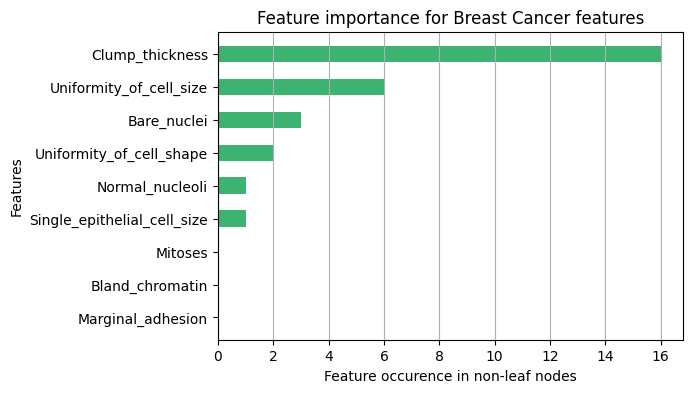

In [47]:
plt.figure(figsize=(6, 4))
fi_bcancer = pd.DataFrame({'Feature': bcancer_Xtrain.columns, 'Importance': tree_bcancer.feature_count})
fi_bcancer = fi_bcancer.sort_values(by='Importance', ascending=True).reset_index(drop=True)
plt.barh(fi_bcancer['Feature'], fi_bcancer['Importance'], height=0.50, color='mediumseagreen')
plt.xlabel('Feature occurence in non-leaf nodes')
plt.ylabel('Features')
plt.title('Feature importance for Breast Cancer features')
plt.grid(axis='x')
plt.show()

#### <b>Additional Experimentation</b>


<div style="text-align: justify">NOTE: For additional tests, we computed a Confusion Table and F1-Score for NHANES due to its imbalanced nature. Accuracy alone may not adequately reflect the model's performance when dealing with imbalanced datasets. The Confusion Table provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions, offering insights into how well the model distinguishes between classes. F1-Score, a metric that considers both precision and recall, is particularly useful in imbalanced scenarios, offering a balanced assessment of the model's ability to correctly identify positive instances while minimizing false positives and false negatives. These supplementary metrics provide a more comprehensive understanding of the model's effectiveness, especially in scenarios where accurate classification of minority classes is critical.</div>

KNN NHANES confusion table


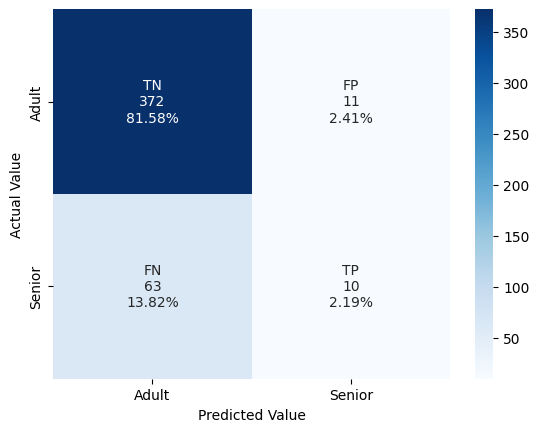

KNN NHANES f1-score on test set: 0.21


In [48]:
# KNN evaluation on testing-set for NHANES

knn_nhanes = KNN(k=11) # K tuned using Validation set
knn_nhanes.fit(Xtrain=nhanes_Xtrain, ytrain=nhanes_ytrain)
knn_predictions_nhanes, knn_predictions_proba_nhanes = knn_nhanes.predict(Xtest=nhanes_Xtest)

nhanes_f1 = f1_score(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)
nhanes_acc = evaluate_acc(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)
nhanes_cm = confusion_matrix(y_pred=knn_predictions_nhanes, y_true=nhanes_ytest)
print('KNN NHANES confusion table')
plot_confusion_table(cm=nhanes_cm, class_label=['Adult', 'Senior'])
print(f'KNN NHANES f1-score on test set: {nhanes_f1:.2f}')

KNN Breast Cancer confusion table


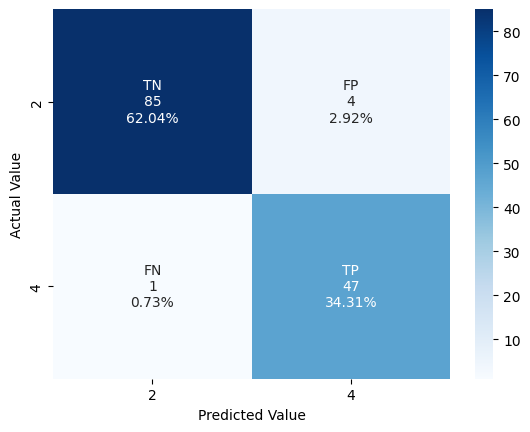

KNN Breast Cancer f1-score: 0.95


In [49]:
# KNN evaluation on testing-set for Breast Cancer

knn_bcancer = KNN(k=5)  # K uned using Validation set
knn_bcancer.fit(Xtrain=bcancer_Xtrain, ytrain=bcancer_ytrain)
knn_predictions_bcancer, knn_predictions_proba_bcancer = knn_bcancer.predict(Xtest=bcancer_Xtest)

bcancer_f1 = f1_score(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)
bcancer_acc = evaluate_acc(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)
bcancer_cm = confusion_matrix(y_pred=knn_predictions_bcancer, y_true=bcancer_ytest)
print('KNN Breast Cancer confusion table')
plot_confusion_table(cm=bcancer_cm, class_label=[2,4])
print(f'KNN Breast Cancer f1-score: {bcancer_f1:.2f}')

DT NHANES confusion table


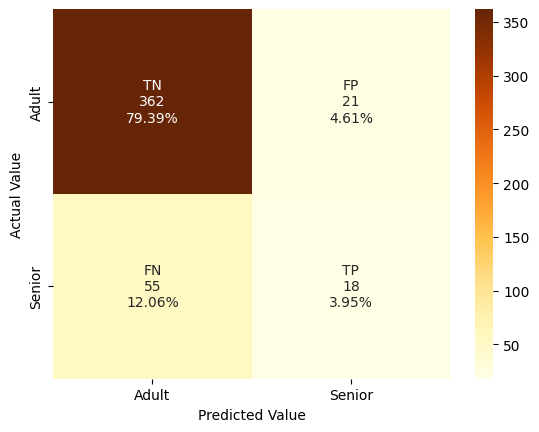

DT NHANES f1-score: 0.32


In [50]:
# NHANES DT

tree_nhanes = DecisionTree(max_depth=5)
probs_test = tree_nhanes.fit(nhanes_Xtrain, nhanes_ytrain).predict(nhanes_Xtest)
dt_y_pred_nhanes = np.argmax(probs_test, 1)

dt_predictions_proba_nhanes = []
for p in probs_test:
    dt_predictions_proba_nhanes.append(p[1])

nhanes_f1 = f1_score(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)
nhanes_acc = evaluate_acc(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)
nhanes_cm = confusion_matrix(y_pred=dt_y_pred_nhanes, y_true=nhanes_ytest)

print('DT NHANES confusion table')
plot_confusion_table(cm=nhanes_cm, class_label=['Adult', 'Senior'], cmap='YlOrBr')
print(f'DT NHANES f1-score: {nhanes_f1:.2f}')

DT reast Cancer confusion table


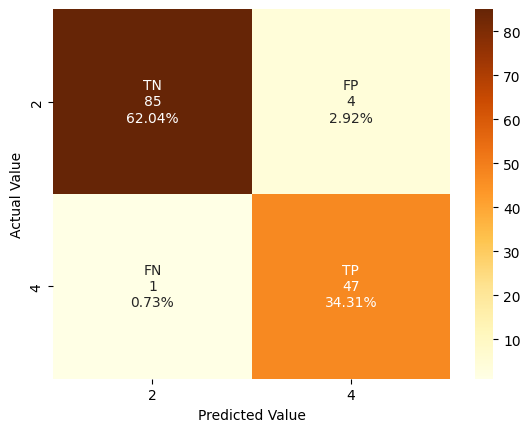

DT Breast Cancer f1-score: 0.95


In [51]:
# Breast Cancer DT

tree_bcancer = DecisionTree(max_depth=5, cost_fn=cost_entropy)
probs_test = tree_bcancer.fit(bcancer_Xtrain, bcancer_ytrain).predict(bcancer_Xtest)
dt_y_pred_bcancer = np.argmax(probs_test, 1)

dt_predictions_proba_bcancer = []
for p in probs_test:
    dt_predictions_proba_bcancer.append(p[1])

bcancer_f1 = f1_score(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)
bcancer_acc = evaluate_acc(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)
bcancer_cm = confusion_matrix(y_pred=dt_y_pred_bcancer, y_true=bcancer_ytest)

print('DT reast Cancer confusion table')
plot_confusion_table(cm=bcancer_cm, class_label=[2,4], cmap='YlOrBr')
print(f'DT Breast Cancer f1-score: {bcancer_f1:.2f}')